# Example analysis of the modified 01 chaos test
### see Gottwald and Merbourne 2004

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We first define the logistic equation and use the parameters as defined in the paper

In [2]:
def equation (r, seed, iterations):
    """
    Outputs the time series plot of the logistic equation given some parameters

    Arguments:
    r            -- growth rate of population
    seed         -- the seed of this function x0
    iterations   -- number of iterations to calculate

    Output:
    out      -- values of X over time given initial condition
    
    """
    
    # initialize output and insert seed
    out = []
    out.append(seed)
    
    x = seed
    # iterate over iterations and calculate new y
    for i in range(iterations):
        # x as Population next year
        x = r*x*(1-x)
        #x = (r*x)+3
        out.append(x)
    return(out)     

This is the figure from Gottwald and Melbourne (2004) we orient on. 
It shows different values of K (y-axis) depended on the selection of the parameter r of the logistic map
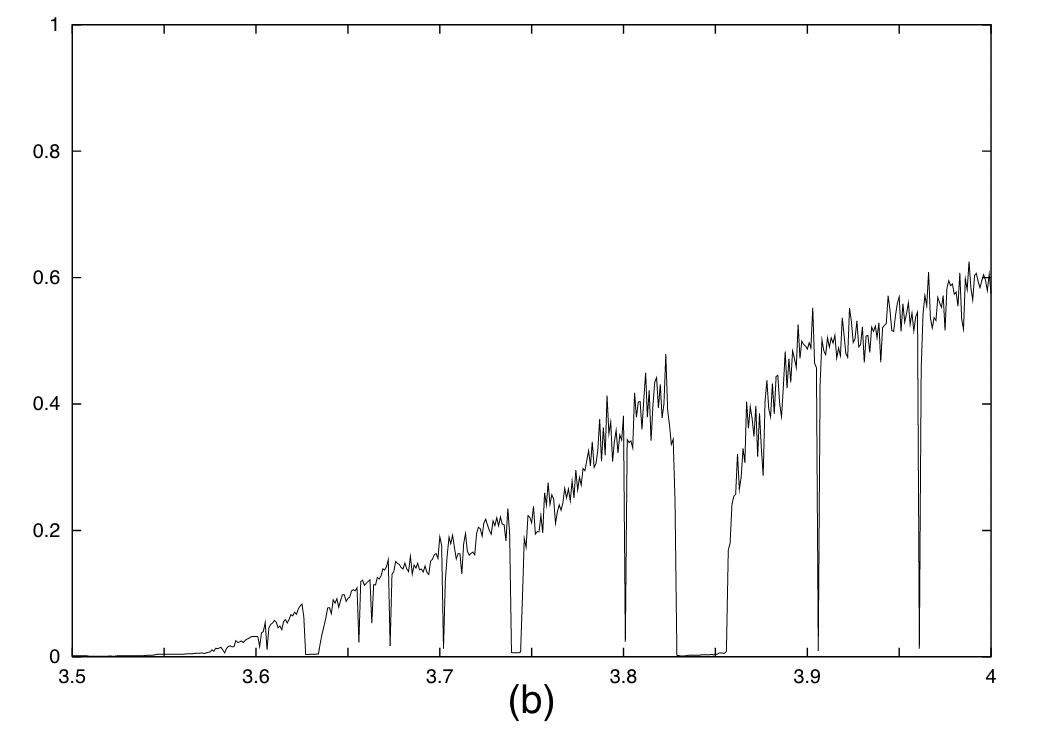

In [3]:
# Define parameters and initial condition

#r = 3.5 # should lead to a close to 0 K
r = 3.85 # should lead to a close to 0 K
#r = 3.81 # should lead to a K arounf .4
#r = 4 # should lead to a K around .6

seed =0.0001
iterations = 21000
transient = 20000

In [4]:
# calculate time-series of the logistic map and define output after transient
out = equation(r, seed, iterations)
Obs = out[transient+1:]  # This is our observerd Time Series

Text(0.5, 1.0, 'Observed time series from logistic map')

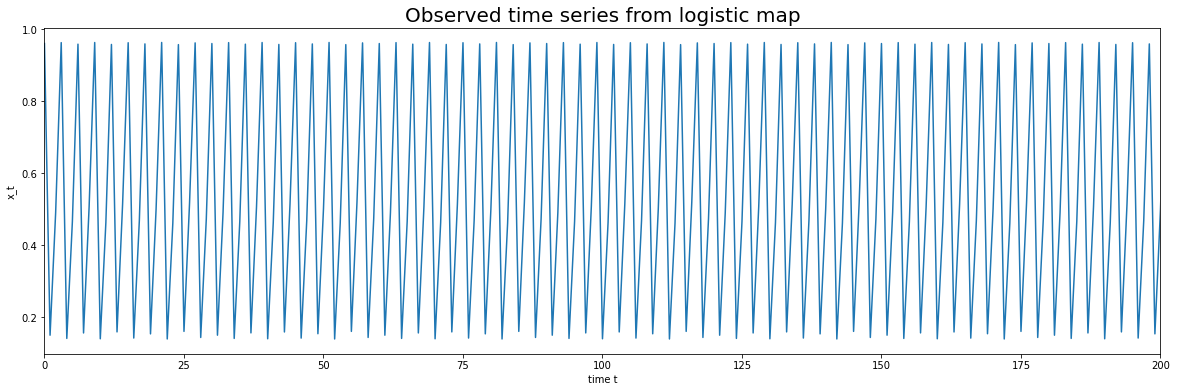

In [5]:
plt.figure(figsize = (20, 6))
plt.plot(out[transient:])
plt.xlabel("time t")
plt.ylabel("x_t")
plt.xlim(0,200)
plt.title('Observed time series from logistic map', fontsize =20)

define parameter c. In the paper, c is radomly reinitiated. 

In [6]:
c = 20

## Defitition of p(n)

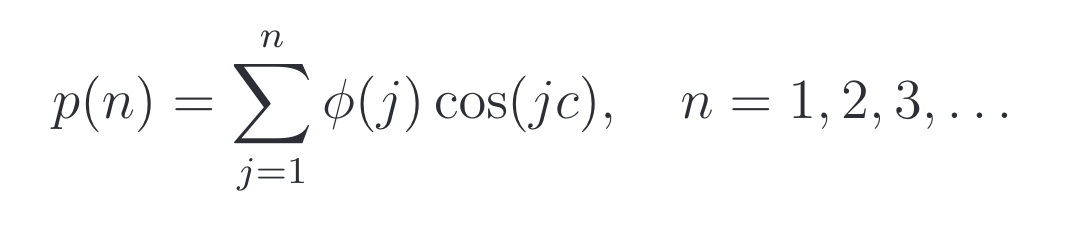


In [7]:
def get_p(Obs,c):
    p = []
    for t in range(len(Obs)):
        p_tmp = np.sum(Obs[:t]*np.cos(np.arange(0,t,1)*c))
        #p_tmp = np.sum(np.array(Obs[:t])*np.cos(t*c))
        p.append(p_tmp)
    return np.array(p)
    

In [8]:
ps = get_p(Obs, c)

### Explore the calculation of p
To see what p is calculating, we plot blow out original observation (blue), the cosinus(jc) (orange), and the produkt after the multiplocation (green) <br>

The function then stepwise increases t and sums up the green function.


### The sum over time P(n) has the following properties:
(i) p(t) is bounded if the underlying dynamics is nonchaotic and <br>
(ii) p(t) behaves asymptotically like a Brownian motion if the underlying dynamics is chaotic.



(0.0, 200.0)

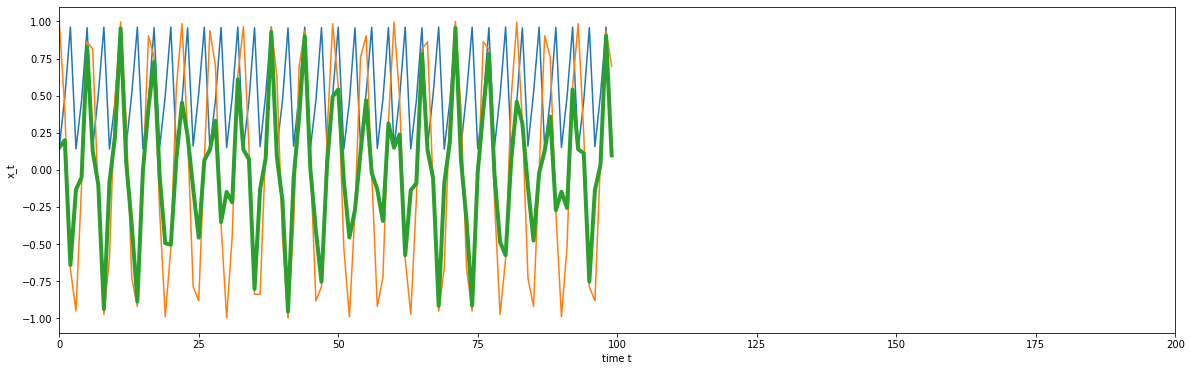

In [9]:
t = 100
plt.figure(figsize = (20, 6))
plt.plot(Obs[:t])
plt.plot(np.cos(np.arange(0,t,1)*c))
plt.plot(Obs[:t]*np.cos(np.arange(0,t,1)*c), linewidth = 4)
plt.xlabel("time t")
plt.ylabel("x_t")
#plt.ylim(0,1)
plt.xlim(0,200)

### Now we can plot the actual p(n) and see its behavior

Text(0, 0.5, 'x_t')

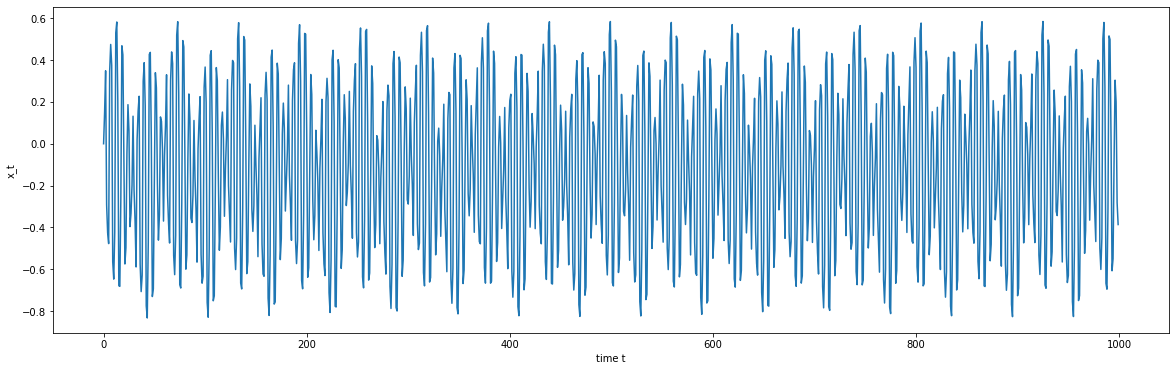

In [10]:
plt.figure(figsize = (20, 6))
plt.plot(ps)
plt.xlabel("time t")
plt.ylabel("x_t")
#plt.ylim(0,1)
#plt.xlim(0,100)

## Calculation of Mean Square displacement

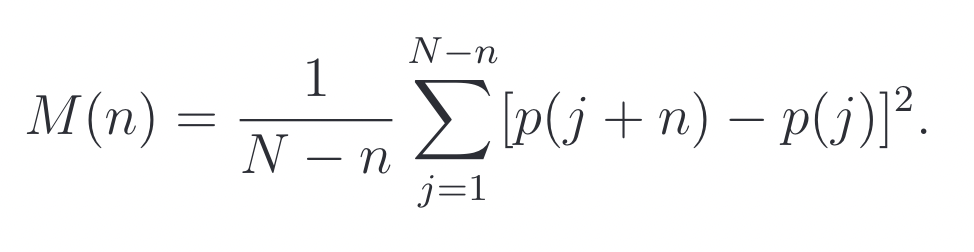

In [11]:
def get_MSD(ps):
    MSD = []
    for t in range(len(Obs)):
        tmp = []
        for j in range(len(Obs)-t):
            tmp.append((ps[j+t]-ps[j])**2)
        MSD.append(np.mean(tmp))
    return MSD

### Explore the MSD
The MSD looks at the displacement of the function over time with a variable delay (i.e. how much one particle moves in average with a certain delay).

"If the behaviour of p(t) is Brownian, i.e. the underlying dynamics is chaotic, then M (t) grows linearly in time; if the behaviour is bounded, i.e. the underlying dynamics is nonchaotic, then M (t) is bounded." Gottwald and Melbourne (2013)



In [12]:
MSDs = get_MSD(ps)

Text(0, 0.5, 'motion')

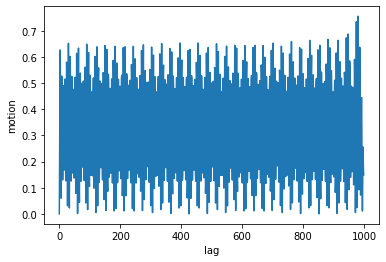

In [13]:
plt.plot(MSDs)
plt.xlabel('lag')
plt.ylabel('motion')

The N is only used as a convenience value, defined by Gottwald and Melbourne 2014. It can be anywhere between 1 and N

In [14]:
N1 = int(len(Obs)/10)
N1

100

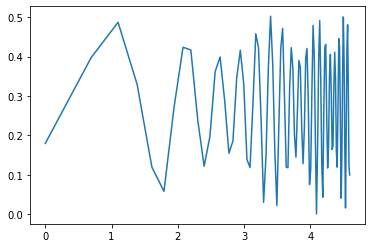

In [15]:
# To avoid logarithms of negative numbers, we plot log(M(n) + 1) 
# against log n for 1 ≤ n ≤ N1 for some choice of N1, 1 ≪ N1 ≪ N
X = np.log(np.arange(1,N1))
Y = np.log(np.array(MSDs[1:N1])+1)
plt.plot(X,Y)

In [16]:
# need to transform for the linear regression
Y = Y.reshape(-1,1)
X = X.reshape(-1,1)

### Calculation of K

Now we can calculate K which is the slope of the above function. K approaches 1 for a more chaotic system.
"The test is now that K close to zero signifies regular dynamics and K close to 1 implies chaotic dynamics." Gottwald Melbourne 2004

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
K = reg.coef_[0][0]
K

-0.005040544573777145

In the paper, they choose several values of c at random, 
computing K for each choice of c. Then we take the median value of K. 
(They do not take the average of K, since when c does fail it can fail quite badly.)

